# IA - Les méthodes d'apprentissage supervisees


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import time
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler 
from keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras import layers
import warnings
warnings.filterwarnings('ignore')

### L'algorithme KppV

Ce programme applique la méthode de discrimination de kppv sur un ensemble d'individu élément de R^2.



#### Les paramètres :

- La variable test :  
    Un tableau qui doit contenir les différents individus à classer rangés par colonne. Le nombre de ligne est 2 et le nombre de colonne est n.
    

- La variable apprentissage : 
    Un tableau qui doit contenir les différents individus de l'ensemble d'apprentissage rangés par colonne. Le nombre de ligne est 2 et le nombre de colonne est m.
    
    
    
- La variable oracle :
     Vecteur qui indique la classification de l'ensemble d'apprentissage oracle[i] indique le nombre de la classe de l'individu apprentissage[:i].
     
     
- La variable K :
   Indique le nombre de voisins utilisés dans l'algorithme.
   
#### Le résultat :

- La variable clas :
    Vecteur qui indique le résultat de l'algorithme de la discrimination clas[i] indique le numéro de la classe de l'individu x[:,i] 
   
 
   
   

### L'exemple de l'execution de l'algorithme

test = [ [3,2],[4,7],[8,9] ]

learn =[
     [ 0  2]
     [ 2  0]
     [ 2  6]
     [ 4  4]
     [ 2  4]
     [ 6  7]
     [10  4]
     [ 4  0]
     [ 4  2]
     [ 6  0]
     [ 6  2]
    ]
    
oracle= [0,0,1,1,0,1,0,0,0,1,1]

k=3

### on calcul distance-euclideanchaque l'élement de test avec l'ensemble des élements learn 

### Etape 1 :

#### 1 - calcul test[0]= [3,2]
    distance-euclidean [3 2]  et  [0 2]  est  3.0
    distance-euclidean [3 2]  et  [2 0]  est  2.23606797749979
    distance-euclidean [3 2]  et  [2 6]  est  4.123105625617661
    distance-euclidean [3 2]  et  [4 4]  est  2.23606797749979
    distance-euclidean [3 2]  et  [2 4]  est  2.23606797749979
    distance-euclidean [3 2]  et  [6 7]  est  5.830951894845301
    distance-euclidean [3 2]  et  [10  4]  est  7.280109889280518
    distance-euclidean [3 2]  et  [4 0]  est  2.23606797749979
    distance-euclidean [3 2]  et  [4 2]  est  1.0
    distance-euclidean [3 2]  et  [6 0]  est  3.605551275463989
    distance-euclidean [3 2]  et  [6 2]  est  3.0

#### 2 - calcul test[1]= [4,7]

    distance-euclidean [4 7]  et  [0 2]  est  6.4031242374328485
    distance-euclidean [4 7]  et  [2 0]  est  7.280109889280518
    distance-euclidean [4 7]  et  [2 6]  est  2.23606797749979
    distance-euclidean [4 7]  et  [4 4]  est  3.0
    distance-euclidean [4 7]  et  [2 4]  est  3.605551275463989
    distance-euclidean [4 7]  et  [6 7]  est  2.0
    distance-euclidean [4 7]  et  [10  4]  est  6.708203932499369
    distance-euclidean [4 7]  et  [4 0]  est  7.0
    distance-euclidean [4 7]  et  [4 2]  est  5.0
    distance-euclidean [4 7]  et  [6 0]  est  7.280109889280518
    distance-euclidean [4 7]  et  [6 2]  est  5.385164807134504

#### 1 - calcul test[2]= [8,9]

    distance-euclidean [8 9]  et  [0 2]  est  10.63014581273465
    distance-euclidean [8 9]  et  [2 0]  est  10.816653826391969
    distance-euclidean [8 9]  et  [2 6]  est  6.708203932499369
    distance-euclidean [8 9]  et  [4 4]  est  6.4031242374328485
    distance-euclidean [8 9]  et  [2 4]  est  7.810249675906654
    distance-euclidean [8 9]  et  [6 7]  est  2.8284271247461903
    distance-euclidean [8 9]  et  [10  4]  est  5.385164807134504
    distance-euclidean [8 9]  et  [4 0]  est  9.848857801796104
    distance-euclidean [8 9]  et  [4 2]  est  8.06225774829855
    distance-euclidean [8 9]  et  [6 0]  est  9.219544457292887
    distance-euclidean [8 9]  et  [6 2]  est  7.280109889280518
    
### Etape 2 :
#### On regarde les k distance minimales 

- pour test[0]=[3,2] sont :

        *    1.O  avec [4 2] indice dans learn 8 
        *    2.23 avec [2 0] indice dans learn 1
        *    2.23 avec [4 4] indice dans learn 3
        
- pour test[1]=[4,7] sont :
        
  
         * 2    avec  [6 7] indice dans learn 5
         * 2.23 avec  [2 6] indice dans learn 2
         * 3    avec  [4 4] indice dans learn 3
         
- pour test[2]=[8 9] sont :
    
        * 2.83 avec [6 7] indice dans learn  5
        * 5.38 avec [10 4] indice dans learn 6
        * 6.4 avec  [4 4] indice dans learn  3
        
### Etape 3 :
#### On regarder les classes/groupe dans des k distances minimales dans oracle 

- pour ***test[0]=[3,2]***   
    
    * oracle[8] = 0
    * oracle[1] = 0
    * oracle[3] = 1
    
    

- pour ***test[1]=[4,7]***  
    
    * oracle[5]= 1
    * oracle[2]= 1
    * oracle[3]= 1




- pour ****test[2]=[8,9]***  

    * oracle[5] = 1
    * oracle[6] = 0
    * oracle[3] = 1
    
### Etape 4 :
#### on vote , on regarde parmis les classes/groupes ce qui sont les plus nombreux 


- pour ***test[0]=[3,2]*** on voit qu'il est de la classe 0 



- pour ***test[1]=[4,7]*** on voit qu'il est de la classe 1



- pour ***test[2]=[8,9]*** on voit qu'il est de la classe 1



    

## L'implementation de l'algorithme KNNV en python 

In [2]:
def dist(x,y,dname='euclidean'):
    
    if (dname == 'manhattan') or (dname == 'cityblock'):
        d = np.sum(np.abs(x-y))
    elif dname == 'euclidean':
        d = np.sqrt(np.sum(np.abs(x-y)**2))
    elif (dname == 'chebychev') or (dname == 'chebyshev'):
        d = np.max(np.abs(x-y))
    elif dname == 'cosine':
        d = 1 - x.dot(y) / np.sqrt(x.dot(x)*y.dot(y))
    else:
        d = np.sqrt(np.sum(np.abs(x-y)**2))       
    return d

In [3]:
def KNNV(test, learn, ylearn, K=1, dname='euclidean'):
    test_nb = test.shape[0]
    learn_nb = learn.shape[0]
    labels_id = np.unique(ylearn)
    labels_nb = len(labels_id)
    dist_to_learn = np.zeros((test_nb, learn_nb))
    votes = np.zeros((test_nb,labels_nb)) 
    for i in range(test_nb):
        for j in range(learn_nb):
            dist_to_learn[i,j] = dist(test[i,:],learn[j,:],dname)  # Etape 1 
        KNN_index = np.argsort(dist_to_learn[i,:])[:K]             # Etape 2  argSort envoit les indices K des element d'un tableau 
        KNN_y = ylearn[[KNN_index]]                                # Etape 3 
        for j in range(labels_nb):
            votes[i,j] = len(np.argwhere(KNN_y==labels_id[j]))     # Etape 4 argWhere Trouvez les indices des éléments du tableau non nuls, regroupés par élément.
    ypred = np.argmax(votes,axis=1) # Returns the indices of the maximum values along an axis.
    return ypred


In [4]:
def affiche_classeKKpV(x,clas,K):
    for k in range(0,K):
        ind=(clas==k)
        plt.plot(x[0,ind],x[1,ind],"o")
    plt.show()

## Jeu d'essaie KNNV

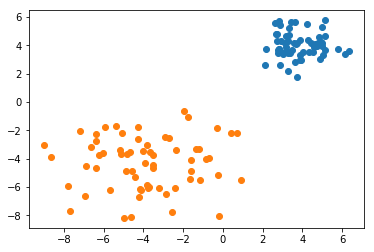

In [5]:
# Données de test
mean1 = [4, 4]
cov1 = [[1, 0], [0, 1]]  

data1 = np.transpose(np.random.multivariate_normal(mean1, cov1, 128))

mean2 = [-4, -4]
cov2 = [[4, 0], [0, 4]]  

data2 = np.transpose(np.random.multivariate_normal(mean2, cov2, 128))
data=np.concatenate((data1, data2), axis=1)

oracle=np.concatenate((np.zeros(128),np.ones(128)))

test1=np.transpose(np.random.multivariate_normal(mean1, cov1, 64))
test2=np.transpose(np.random.multivariate_normal(mean2, cov2,64))

test=np.concatenate((test1,test2), axis=1)
K=3
clas=KNNV(test.T,data.T,oracle,K)
affiche_classeKKpV(test,clas,2)

## Le Perceptron

## -  1 Mise en place d'un perceptron simple

Ce programme doit évaluer la sortie d'un perceptron simple ( 1 neurone ) pour une entrée élément de R^2.

### Les Paramètres :

    - La variable w contient les poids synaptiques du  neurones. C'est un vecteur à 3 lignes. La première ligne correspond au seuil.
    - La variable x contient l'éntrée du réseau de neurones. C'est un vecteur à 2 lignes.
    - La variable active indique la fonction d'activation utilisée. 
    
    * Si active == 0 :
      σ(x) = sign(x)
    * Si active == 1 :
      σ(x) = tanh(x)
      
### Le Résultat :

    - La variable y est un scalaire correspondant à la sortie du neurone
    
## - 2 Etude de l'apprentissage 
    
    
Ce programme retourne le poids de w obtenu par apprentissage selon la règle d'apprentissage utilisant la descente du gradient .


### Les paramètres :

 - La variable x contient l'ensemble d'apprentissage. C'est une matrice à 2 lignes et n colonnes.
 
 - La variable yd(i) indique la réponse désirée pour chaque élément x(:,i). 
 
 yd est un vecteur de 1 ligne et n colonnes de valeurs +1 ou -1 (classification à 2 classes).
 
 - On suggère d'utiliser 100 itérations 
 
 
### Le Résultat :

 - La variable w contient les poids synaptiques du neurone après apprentissage. C'est un vecteur à 3 lignes . La première ligne correspond au seuil.
 
 
 - La variable erreur contient l'erreur cumulée calculée pour le passage complet de l'ensemble d'apprentissage à savoir :
 
 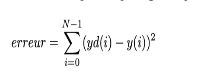
         
        
La variable erreur sera un vecteur de taille fixée par le nombre d'itération. Cela permettra de représenter l'évolution de l'erreur au cours des itérations de l'apprentissage.
 
    

### L'exemple de l'execution de l'algorithme

|     Xt      | Yt           |
|:------------|:------------:|
|   [2,0]     |   1          |
|   [0,3]     |   0          |
|   [3,0]     |   0          |
|   [1,1]     |   1          |


* Simulation avec biais α = 0.1 



* Initialisation w <- [0,0], b=0.5

### Pour chaque paire (Xt,Yt):

#### Etape 1 ***le perceptron***

    h(xt)=Threshold(z)
    
    où z= w*xt+b 
     
    et Threshold(z)=1 si z >=0 et 0 sinon
    
    
    # pour l'algo en dessous on utilise la focntion activation 
    # si active == 0 Threshold(z)= 
    
Pour x1=[2,0]
    
    h(x1)= [0,0]*[2 0] + 0.5 = 0.5
    
    donc 
    
    Threshold(0.5)= 1 
    
#### Etape 2  mettre à jour le ***w*** et le ***b***
    
    - Si h(xt) = yt , on ne fait pas de mise à jour 
    - Si h(xt) != yt , on fait la mise à jour 
        *  w = w + α(y2 - h(x2)) x2
        *  b = b + α(y2 - h(x2) 
    
puisque h(x1)=y1 , on ne fait pas de mise à jour 

On continue la boucle 

####  Pour x2=[0,3]

#### Etape 1 :
  
    h(x2)=[0,0]*[0,3]+0.5 = 1
    
#### Etape 2 :
     h(x2)!= y2
     
     - mise à jour :
     * w = [0,0] + 0.1 *(0-1) * [0,3] = [0,-0.3]
     * b = [0,0]+0.1*(0-1) = 0.4
    

On continue la boucle 

    
   


## L'implementation de l'algorithme le Perceptron en python 

In [6]:
# Le coefficient d'apprentissage α sera égal à 0.1 



def perceptron(x,w,active):
    z=np.dot(x,[w[0][1],w[0][2]]) + w[0][0]
    if active ==0:
        y= np.sign(z)
    else:
        y=np.tanh(z)
    return y
           
def apprentissage(x,yd,active):
    erreur=[]
    w=np.array([[0.5,0,0]])
    for _ in range(100):
        sum_erreur=0
        for i, x_i in enumerate(x):
            y=perceptron([ x_i[0],x_i[1] ],w,active) # Etape 1
            active=np.tanh(y)
            if(y!=yd[i]):  # Etape 2 
                # mise à jour w 
                tmp=[x_i[0],x_i[1]]
                val=0.1*(yd[i]-y)
                wtmp = np.add([w[0][1],w[0][2]],np.dot(val,tmp))
                w[0][1]=wtmp[0]
                w[0][2]=wtmp[1]
    
                # mise à jour b
                
                w[0][0]=w[0][0] + 0.1*( yd[i] -y)
                
                # calcul erreur 
                
                sum_erreur+=(yd[i]-y)**2
                
        erreur.append(sum_erreur)
        
    
    return w,erreur
   
def affiche_classe(x,clas,K,w):
    t=[np.min(x[0,:]),np.max(x[0,:])]
    z=[(-w[0,0]-w[0,1]*np.min(x[0,:]))/w[0,2],(-w[0,0]-w[0,1]*np.max(x[0,:]))/w[0,2]]
    plt.plot(t,z);
    ind=(clas==-1)
    plt.plot(x[0,ind],x[1,ind],"o")
    ind=(clas==1)
    plt.plot(x[0,ind],x[1,ind],"o")
    plt.show()


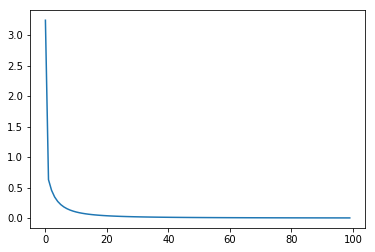

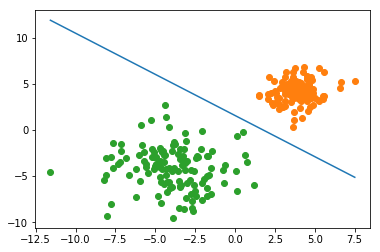

In [7]:
# Données de test
mean1 = [4, 4]
cov1 = [[1, 0], [0, 1]]  # 
data1 = np.transpose(np.random.multivariate_normal(mean1, cov1, 128))
mean2 = [-4, -4]
cov2 = [[4, 0], [0, 4]]  # 
data2 = np.transpose(np.random.multivariate_normal(mean2, cov2, 128))
data=np.concatenate((data1, data2), axis=1)
oracle=np.concatenate((np.zeros(128)-1,np.ones(128)))
w,mdiff=apprentissage(data.T,oracle,1)

plt.plot(mdiff)
plt.show()
affiche_classe(data,oracle,2,w)

### Cette partie du Tp a pour but de mettre en oeuvre un ***Anti-Spam*** en réalisant des modéles de classifieurs binaires construits à l'aide d'un ***DataSet*** basé sur les activités normales et anormales d'une messagerie électronique

### Prétraitement de données 

In [35]:
# ====== Préparation des données =======
# chargement des données
creation = pd.read_csv("Uses_Cases/Spam/Spamcreation.csv")
pred = pd.read_csv("Uses_Cases/Spam/Spamprediction.csv",skipinitialspace=True)
heads = list(pred.keys())
pred = pd.read_csv("Uses_Cases/Spam/Spamprediction.csv",skipinitialspace=True,usecols=heads)

# On peut utiliser les fonctions de pandas pour veridier les données
#pred.describe() #récapitulative sur les données 
#pred.tail()  # la dernière ligne
pred.head()  # la première ligne


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
0,0.70,0.00,0.70,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.105,0.000,0.000,2.342,47,89,0
1,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.000,1.000,1,4,0
2,0.00,0.00,0.00,0.0,0.00,0.0,0.45,0.91,0.45,0.91,...,0.000,0.254,0.0,0.063,0.127,0.000,4.735,46,161,1
3,1.88,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.000,0.168,0.0,0.112,0.000,0.056,2.933,23,311,0
4,0.07,0.07,0.07,0.0,0.14,0.0,0.00,0.43,0.00,0.00,...,0.056,0.094,0.0,0.000,0.028,0.000,2.394,24,881,0


In [132]:
freqEmailYes=[]
freqEmailNo=[]
freqYes=[]
freqNo=[]

for i in range(len(pred.Spam)):
    if pred.Spam[i]==0:
        freqEmailYes.append(pred.word_freq_mail[i])
        freqYes.append(pred.word_freq_internet[i])
    else:
        freqEmailNo.append(pred.word_freq_mail[i])
        freqNo.append(pred.word_freq_internet[i])
        

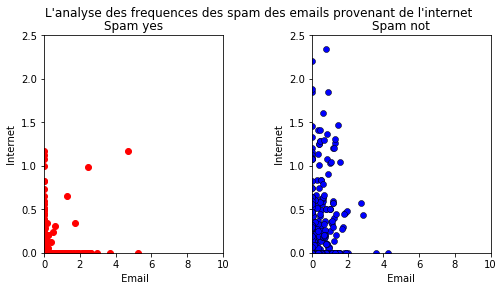

In [135]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(freqEmailYes, freqYes, color="red")
ax[1].scatter(freqEmailNo, freqNo, color="blue", edgecolors="black", lw=0.5)

ax[0].set_title("Spam yes")
ax[1].set_title("Spam not")
ax[0].set_xlabel(" Email")
ax[1].set_xlabel(" Email ")
ax[0].set_ylabel(" Internet ")
ax[1].set_ylabel(" Internet ")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("L'analyse des frequences des spam des emails provenant de l'internet ")

plt.show()

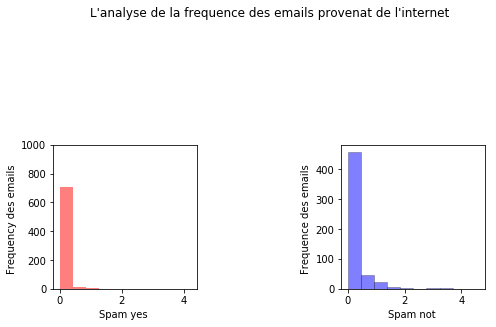

In [139]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(freqYes, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(freqNo, 10, facecolor='blue', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Spam yes ")
ax[0].set_ylabel("Frequency des emails ")
ax[1].set_xlabel("Spam not ")
ax[1].set_ylabel("Frequence des emails ")
fig.suptitle("L'analyse de la frequence des emails provenat de l'internet")

plt.show()

### Conclusion du pretraitement  des données

D'après l'analyse des données on voit qu'un ***spam*** est define selon une frequence des mots des variables du Dataset.

Donc notre réseau de neurones va analyser ces frequences pour predire si on est dans un cas de spam ou non.

### 1 - Construire un modèle M1 basé sur une architecture à base de neurones sans couches cachées

In [102]:


# voir la liste de variables 
#print(pred.info())

# Verfication du nombre de classes observer dans la variable Spam
#print(pd.value_counts(pred.Spam))

# coder les labels dans le format one-hot
y=to_categorical(pred.Spam)
#print(np.sum(y,axis=0)) verifier si on a la bonne distribution des classes

#isoler les descripteurs 
X= pred.iloc[:,1:]

# on subdivise 274 en test et 1000 en apprentissage

Xtrain,Xtest,Ytrain,Ytest = model_selection.train_test_split(X,y,test_size=274,random_state=100)



# standardisation des descripteurs
cr = StandardScaler(with_mean=True,with_std=True)

# calcul des paramètres + centrage réduction du train set

XtrainSd = cr.fit_transform(Xtrain)


# architecture du réseau: sans couche cachée de 512 neuronnes et sans dropout.

network = Sequential() 
# Ajouter une couche d'entrée
network.add(layers.Dense(12,activation='relu',input_shape=(57,)))
# Ajouter une couche de sortie
network.add(layers.Dense(2,activation='sigmoid'))





# compilation - algorithme d'optimisation
network.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
            
    
   
# Lancement de l'apprentissage
network.fit(XtrainSd, Ytrain, epochs=10, batch_size=10, verbose = 1)


#Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape
# Evaluation du modèle
test_loss, test_acc = network.evaluate(Xtest, Ytest)

# Affichage du résultat
print ('Acccuracy = ', test_acc)
#Le modèle est testé et il donne une accuracy de 98,09%"""

Epoch 1/10
100/100 [==============================] - 0s 592us/step - loss: 0.6448 - accuracy: 0.6300
Epoch 2/10
100/100 [==============================] - 0s 607us/step - loss: 0.4007 - accuracy: 0.8840
Epoch 3/10
100/100 [==============================] - 0s 607us/step - loss: 0.2616 - accuracy: 0.9410
Epoch 4/10
100/100 [==============================] - 0s 600us/step - loss: 0.1741 - accuracy: 0.9560
Epoch 5/10
100/100 [==============================] - 0s 631us/step - loss: 0.1202 - accuracy: 0.9710
Epoch 6/10
100/100 [==============================] - 0s 618us/step - loss: 0.0848 - accuracy: 0.9810
Epoch 7/10
100/100 [==============================] - 0s 617us/step - loss: 0.0614 - accuracy: 0.9880
Epoch 8/10
100/100 [==============================] - 0s 614us/step - loss: 0.0448 - accuracy: 0.9920
Epoch 9/10
100/100 [==============================] - 0s 610us/step - loss: 0.0337 - accuracy: 0.9980
Epoch 10/10
9/9 [==============================] - 0s 701us/step - loss: 38.9511 -